Importation des librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Chargement des fichiers CSV dans un DataFrame

In [23]:
df= pd.read_csv("C:/Users/delah/Travail/M1/S2/Stage Laboratoire M1/Nebulosit-nocturne-Reunion/Fichier excel/urbsrn_2024-02_donnnées_IR.csv", delimiter= ';')
dfT = pd.read_csv("C:/Users/delah/Travail/M1/S2/Stage Laboratoire M1/Nebulosit-nocturne-Reunion/Fichier excel/Data_TESS-W_02-2024.csv", delimiter= ';')
df_03_24 = pd.read_csv("C:/Users/delah/Travail/M1/S2/Stage Laboratoire M1/Fichier excel/urbsrn_2024-03.csv", delimiter= ';')
df_03_24T = pd.read_csv("C:/Users/delah/Travail/M1/S2/Stage Laboratoire M1/Fichier excel/Data_TESS-W_03_2024.csv", delimiter= ';')

Définition des données

In [17]:
# CRGE-4
IR_aa03_Avg = df['IR_aa03_Avg']
#IR_aa03_Max = df['IR_qa03_Max']
#IR_aa03_Min = df['IR_qa03_Min']
#IR_aa03_Std = df['IR_aa03_Std']
IR_qa03_Avg = df['IR_qa03_Avg']
#IR_qa03_Max = df['IR_qa03_Max']
#IR_qa03_Min = df['IR_qa03_Min']
#IR_qa03_Std = df['IR_qa03_Std']

day = df['day']
hour = df['hour']

# Temps 
df['DateTime'] = pd.to_datetime(df['day'] + ' ' + df['hour'], dayfirst = True)

# TESS-W
#mag = dfT['mag']
t_amb = dfT['tamb']
t_sky = dfT['tsky']
p_sky = dfT['psky']
p_sky_e = dfT['psky_e']


dayT = dfT['Day']
hourT = dfT['Hour']

# Temps TESS-W
dfT['DateTimeT'] = pd.to_datetime(dfT['Day'] + ' ' + dfT['Hour'], dayfirst = True)

Date = df['DateTime']
DateT = dfT['DateTimeT']

Variable CRG4 03-2024

In [24]:
day_03_24 = df_03_24['day']
hour_03_24 = df_03_24['hour']
df_03_24['DateTime'] = pd.to_datetime(df_03_24['day'] + ' ' + df_03_24['hour'], dayfirst = True)

IR_aa03_Avg_03_24 = df_03_24['IR_aa03_Avg']
IR_qa03_Avg_03_24 = df_03_24['IR_qa03_Avg']

Date_03_24 = df_03_24['DateTime']

In [25]:
day_03_24T = df_03_24T['day']
hour_03_24T = df_03_24T['hour']
df_03_24T['DateTime'] = pd.to_datetime(df_03_24T['day'] + ' ' + df_03_24T['hour'], dayfirst = True)

t_amb_03_24 = df_03_24T['tamb']
t_sky_03_24 = df_03_24T['tsky']

Date_03_24T = df_03_24T['DateTime']

t_amb_03_24_K = df_03_24T['tamb'] + 273
t_sky_03_24_K = df_03_24T['tsky'] + 273

Graphe CRG4 03-2024

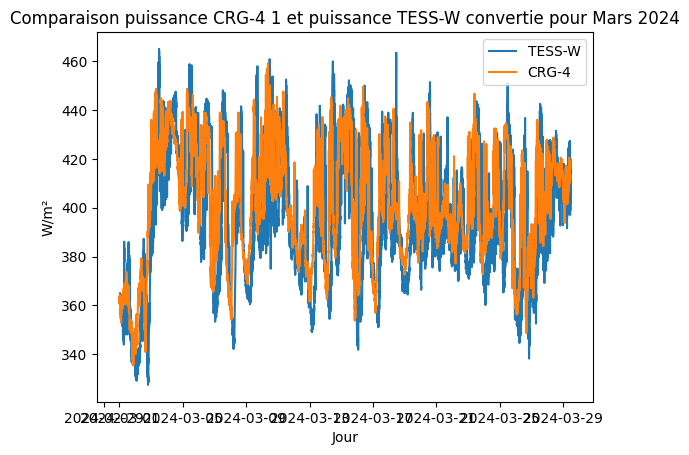

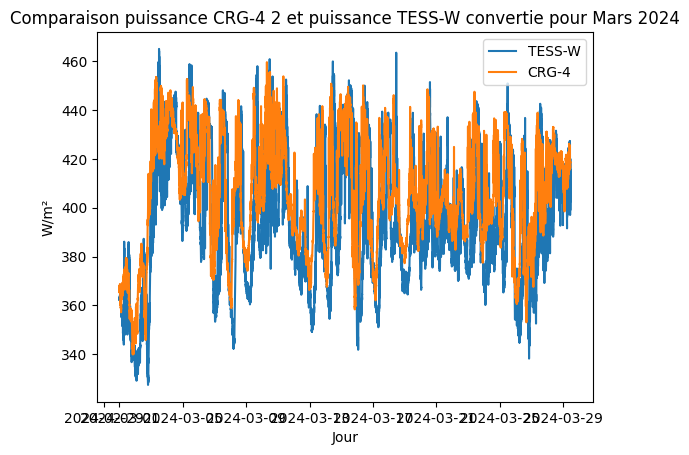

In [32]:
plt.plot(Date_03_24T, 5.670374*10**-8*(t_sky_03_24_K)**4, label = 'TESS-W')
plt.plot(Date_03_24, IR_qa03_Avg_03_24, label = 'CRG-4')
plt.title('Comparaison puissance CRG-4 1 et puissance TESS-W convertie pour Mars 2024')
plt.xlabel('Jour')
plt.ylabel('W/m²')
plt.legend()
plt.show()

plt.plot(Date_03_24T, 5.670374*10**-8*(t_sky_03_24_K)**4, label = 'TESS-W')
plt.plot(Date_03_24, IR_aa03_Avg_03_24, label = 'CRG-4')
plt.title('Comparaison puissance CRG-4 2 et puissance TESS-W convertie pour Mars 2024')
plt.xlabel('Jour')
plt.ylabel('W/m²')
plt.legend()

Méthode détermination nébulosité

In [95]:
Diff_T = dfT['DiffT']

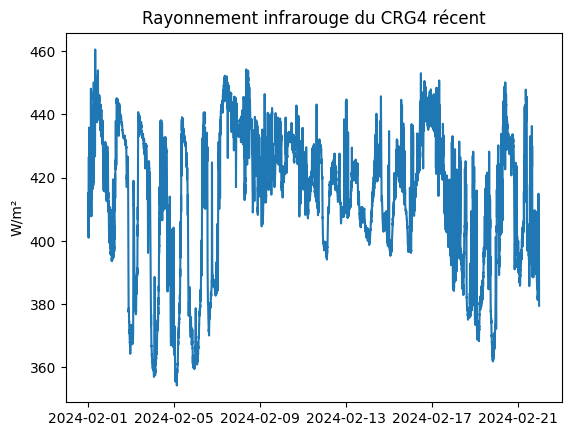

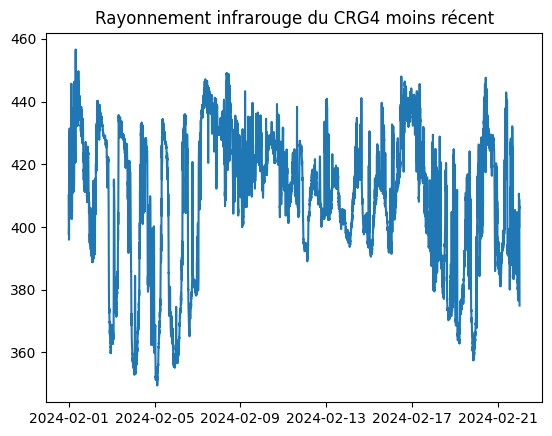

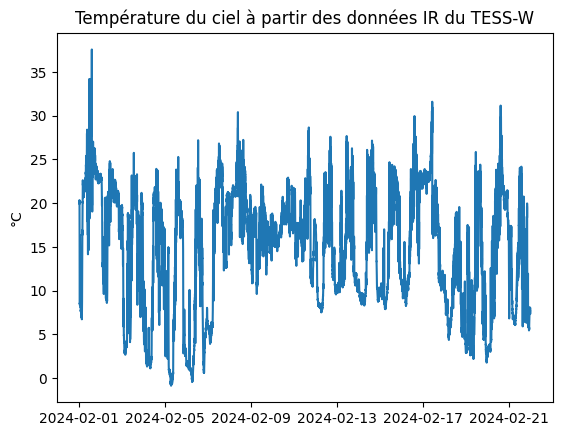

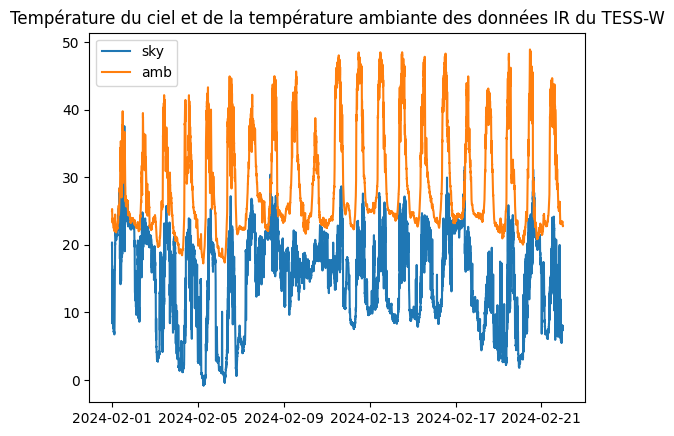

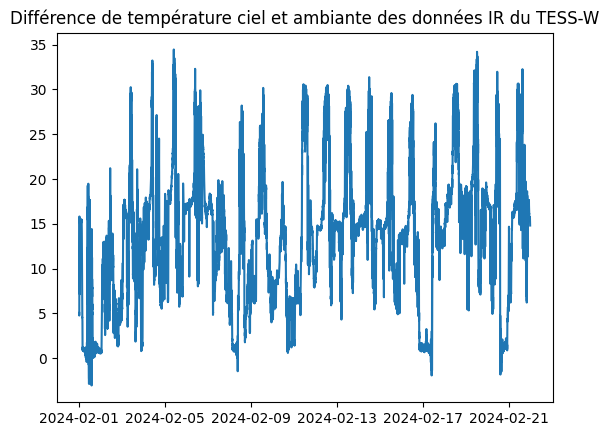

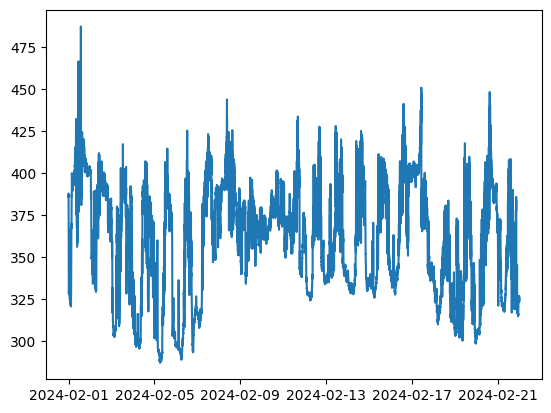

Text(0.5, 1.0, 'Données CRG4 et TESS-W')

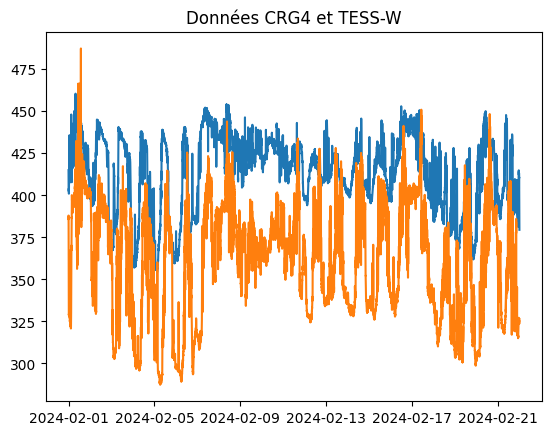

In [96]:
plt.plot(Date, IR_aa03_Avg)
plt.title('Rayonnement infrarouge du CRG4 récent')
plt.ylabel('W/m²')
plt.show()
plt.plot(Date, IR_qa03_Avg)
plt.title('Rayonnement infrarouge du CRG4 moins récent')
plt.show()

plt.plot(DateT, t_sky, label='sky')
plt.title('Température du ciel à partir des données IR du TESS-W')
plt.ylabel('°C')
plt.show()

plt.plot(DateT, t_sky, label='sky')
plt.plot(DateT, t_amb, label='amb')
plt.title('Température du ciel et de la température ambiante des données IR du TESS-W')
plt.legend()
plt.show()

plt.plot(DateT, t_amb - t_sky)
plt.title('Différence de température ciel et ambiante des données IR du TESS-W')
plt.show()
plt.plot(DateT, p_sky_e)
plt.show()

plt.plot(Date, IR_aa03_Avg)
plt.plot(DateT, p_sky_e)
plt.title('Données CRG4 et TESS-W')

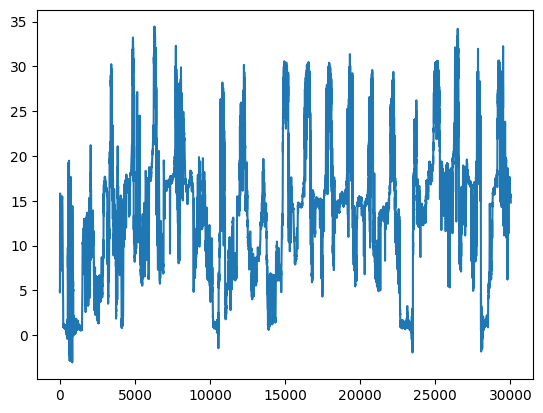

In [97]:
plt.plot(Diff_T)